/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_3055/2501640128.py:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 20 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7120661122465721, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


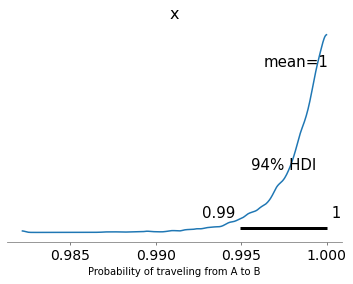

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
num_days = 20
num_people = np.random.randint(5, 50, size=num_days)

# Define the Bayesian model
with pm.Model() as model:
    # Prior for the probability of traveling from A to B (uniform distribution)
    p = pm.Uniform('p', lower=0, upper=1)
    
    # Likelihood function - Binomial distribution
    likelihood = pm.Binomial('likelihood', n=num_people, p=p, observed=num_people)

# Perform inference using MCMC
with model:
    # Use Metropolis-Hastings algorithm for MCMC sampling
    trace = pm.sample(5000, tune=1000, chains=4)

# Visualize the posterior distribution of p
pm.plot_posterior(trace['p'])
plt.xlabel('Probability of traveling from A to B')
plt.show()



/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_3055/1975409293.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=5000, tune=1000, chains=4, step=pm.Metropolis())
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_BC]
>Metropolis: [p_AC]
>Metropolis: [p_AB]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 18 seconds.
The number of effective samples is smaller than 25% for some parameters.


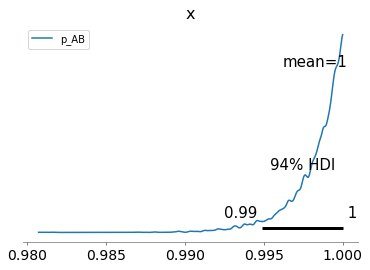

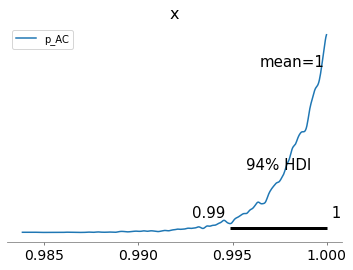

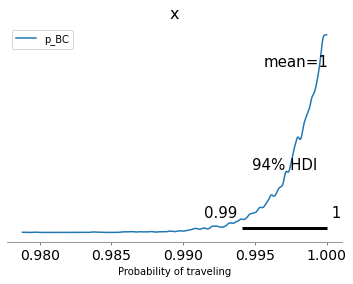

In [2]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
num_days = 20
num_people_AB = np.random.randint(5, 50, size=num_days)
num_people_AC = np.random.randint(5, 50, size=num_days)
num_people_BC = np.random.randint(5, 50, size=num_days)

# Define the Bayesian model
with pm.Model() as model:
    # Priors for the probabilities of traveling between cities
    p_AB = pm.Uniform('p_AB', lower=0, upper=1)
    p_AC = pm.Uniform('p_AC', lower=0, upper=1)
    p_BC = pm.Uniform('p_BC', lower=0, upper=1)
    
    # Likelihood functions - Binomial distributions
    likelihood_AB = pm.Binomial('likelihood_AB', n=num_people_AB, p=p_AB, observed=num_people_AB)
    likelihood_AC = pm.Binomial('likelihood_AC', n=num_people_AC, p=p_AC, observed=num_people_AC)
    likelihood_BC = pm.Binomial('likelihood_BC', n=num_people_BC, p=p_BC, observed=num_people_BC)

# Perform inference using Gibbs sampling and Metropolis-Hastings
with model:
    # Use Gibbs sampling to sample from conditional distributions
    trace = pm.sample(draws=5000, tune=1000, chains=4, step=pm.Metropolis())

# Visualize the posterior distributions of p_AB, p_AC, and p_BC
pm.plot_posterior(trace['p_AB'], label='p_AB')
pm.plot_posterior(trace['p_AC'], label='p_AC')
pm.plot_posterior(trace['p_BC'], label='p_BC')
plt.xlabel('Probability of traveling')
plt.legend()
plt.show()


In [4]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with missing values (nulls)
np.random.seed(42)
observed_survival_times = np.random.exponential(scale=10, size=50)
missing_survival_times = [None] * 10  # Assume 10 missing values

# Combine observed and missing data
all_survival_times = np.concatenate([observed_survival_times, np.array(missing_survival_times)])

# Create a masked array to handle missing values
masked_survival_times = np.ma.masked_invalid(all_survival_times)

# Define the Bayesian model
with pm.Model() as model:
    # Prior for the rate parameter λ
    lambda_ = pm.Uniform('lambda_', lower=0, upper=1)
    
    # Likelihood function - Exponential distribution
    likelihood = pm.Exponential('likelihood', lam=lambda_, observed=observed_survival_times)
    
    # Missing data imputation using latent variables
    missing_values = pm.Exponential('missing_values', lam=lambda_, observed=masked_survival_times)

# Perform inference using Markov Chain Monte Carlo (MCMC) sampling
with model:
    trace = pm.sample(draws=5000, tune=1000, chains=4)

# Visualize the posterior distribution of λ
pm.plot_posterior(trace['lambda_'], label='λ')
plt.xlabel('Rate parameter λ')
plt.legend()
plt.show()

# Impute missing survival times using posterior predictive sampling
imputed_survival_times = pm.sample_posterior_predictive(trace, model=model, samples=1000)['missing_values']

# Visualize the imputed survival times
plt.hist(imputed_survival_times, bins=20, density=True, alpha=0.5, label='Imputed')
plt.hist(all_survival_times[~np.isnan(all_survival_times)], bins=20, density=True, alpha=0.5, label='Observed')
plt.xlabel('Survival Time')
plt.legend()
plt.show()



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [5]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Bayesian logistic regression model
with pm.Model() as logistic_model:
    # Coefficients of the logistic regression
    coeffs = pm.Normal('coeffs', mu=0, sd=1, shape=X_train_scaled.shape[1])
    
    # Linear combination of features and coefficients
    logits = pm.math.dot(X_train_scaled, coeffs)
    
    # Logistic transformation to get probabilities
    probabilities = pm.math.sigmoid(logits)
    
    # Likelihood function - Bernoulli distribution for binary classification
    y_observed = pm.Bernoulli('y_observed', p=probabilities, observed=y_train)

# Perform inference using Markov Chain Monte Carlo (MCMC) sampling
with logistic_model:
    trace = pm.sample(draws=5000, tune=1000, chains=4)

# Plot the posterior distribution of coefficients
pm.plot_posterior(trace['coeffs'], var_names=['coeffs'], ref_val=0, hdi_prob=0.95)
plt.xlabel('Coefficient Value')
plt.ylabel('Posterior Density')
plt.title('Posterior Distribution of Coefficients')
plt.show()

# Predict using the posterior mean of coefficients
coeffs_mean = np.mean(trace['coeffs'], axis=0)
logits_test = np.dot(X_test_scaled, coeffs_mean)
probabilities_test = 1 / (1 + np.exp(-logits_test))
y_pred = (probabilities_test >= 0.5).astype(int)

# Evaluate the model performance
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy:.2f}")


/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_3055/2588273368.py:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=5000, tune=1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coeffs]


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 18 seconds.
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:216: UserWarning: More chains (20000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


KeyError: 'var names: "[\'coeffs\'] are not present" in dataset'

In [ ]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for two-way ANOVA
np.random.seed(42)
n_samples = 100
categories_A = ['A1', 'A2', 'A3']
categories_B = ['B1', 'B2']
n_categories_A = len(categories_A)
n_categories_B = len(categories_B)

# Generate random factor levels and response values
A = np.random.choice(categories_A, size=n_samples)
B = np.random.choice(categories_B, size=n_samples)
Y = np.random.normal(loc=10 + 2 * (A == 'A2') + 3 * (B == 'B2'), scale=2)

# Encode the categorical factors using integers
A_indices = np.arange(n_categories_A)
B_indices = np.arange(n_categories_B)
A_dict = {category: index for index, category in zip(A_indices, categories_A)}
B_dict = {category: index for index, category in zip(B_indices, categories_B)}
A_encoded = np.array([A_dict[category] for category in A])
B_encoded = np.array([B_dict[category] for category in B])

# Define the Bayesian two-way ANOVA model
with pm.Model() as anova_model:
    # Prior distributions for means and standard deviations of factors A and B
    mu_A = pm.Normal('mu_A', mu=0, sd=10, shape=n_categories_A)
    mu_B = pm.Normal('mu_B', mu=0, sd=10, shape=n_categories_B)
    sigma_A = pm.HalfNormal('sigma_A', sd=10, shape=n_categories_A)
    sigma_B = pm.HalfNormal('sigma_B', sd=10, shape=n_categories_B)
    
    # Model the observed data using a normal distribution
    Y_observed = pm.Normal('Y_observed', mu=mu_A[A_encoded] + mu_B[B_encoded], sd=pm.math.sqrt(sigma_A[A_encoded]**2 + sigma_B[B_encoded]**2), observed=Y)

# Perform inference using Markov Chain Monte Carlo (MCMC) sampling
with anova_model:
    trace = pm.sample(draws=5000, tune=1000, chains=4)

# Plot the posterior distributions of means for factors A and B
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, (factor, factor_values, factor_label) in enumerate(zip([mu_A, mu_B], [categories_A, categories_B], ['A', 'B'])):
    pm.plot_posterior(factor, var_names=[f'mu_{factor_label}'], ref_val=0, hdi_prob=0.95, ax=axes[i])
    axes[i].set_xticks(np.arange(len(factor_values)))
    axes[i].set_xticklabels(factor_values)
    axes[i].set_xlabel(f'Factor {factor_label}')
    axes[i].set_ylabel('Posterior Density')
plt.suptitle('Posterior Distributions of Means for Factors A and B')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_3055/2291402431.py:30: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000, chains=4, random_seed=42)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [cluster_assignment]
>NUTS: [cluster_sd, cluster_means]


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 47 seconds.
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered i

IndexError: list index out of range

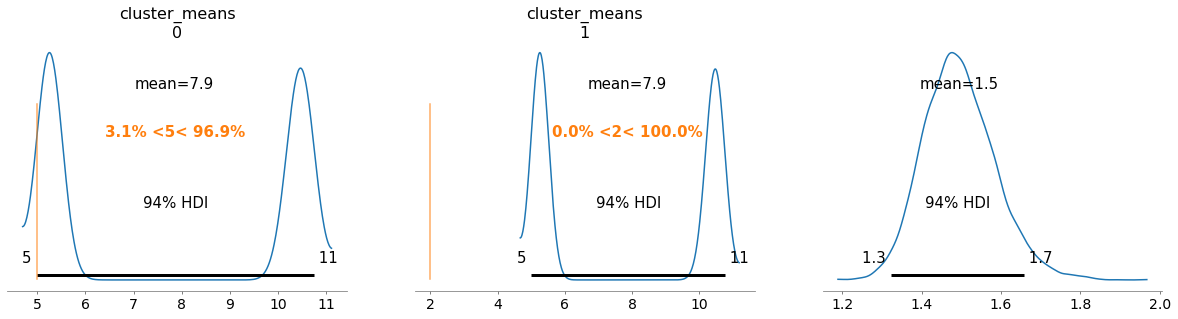

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

# Generate synthetic data from two Gaussian distributions
np.random.seed(42)
n_samples = 100
data1 = np.random.normal(loc=5, scale=1, size=n_samples)
data2 = np.random.normal(loc=10, scale=2, size=n_samples)
observed_data = np.concatenate([data1, data2])

# Define the number of clusters
n_clusters = 2

# Create a PyMC3 model
with pm.Model() as model:
    # Prior distribution for the cluster assignment
    cluster_assignment = pm.Categorical('cluster_assignment', p=np.ones(n_clusters)/n_clusters, shape=len(observed_data))
    
    # Prior distributions for the cluster means
    cluster_means = pm.Normal('cluster_means', mu=[6, 9], sd=5, shape=n_clusters)
    
    # Prior distribution for the common standard deviation
    cluster_sd = pm.HalfCauchy('cluster_sd', beta=5)
    
    # Likelihood for the observed data
    likelihood = pm.Normal('likelihood', mu=cluster_means[cluster_assignment], sd=cluster_sd, observed=observed_data)
    
    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, chains=4, random_seed=42)

# Plot the posterior distributions of the cluster means and standard deviation
pm.plot_posterior(trace, var_names=['cluster_means', 'cluster_sd'], ref_val=[5, 2])
plt.show()

# Plot the cluster assignments for each data point
pm.traceplot(trace, var_names='cluster_assignment')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

# Generate synthetic data from two groups
np.random.seed(42)
n_groups = 2
group_sizes = [50, 70]
group_data = [np.random.normal(loc=5, scale=1, size=group_sizes[0]),
              np.random.normal(loc=10, scale=2, size=group_sizes[1])]
observed_data = np.concatenate(group_data)

# Define the number of groups and individuals
n_groups = len(group_data)
n_individuals = len(observed_data)

# Create a PyMC3 model
with pm.Model() as model:
    # Hyperprior for the group mean
    group_mean = pm.Normal('group_mean', mu=0, sd=10)
    
    # Prior for the group standard deviation
    group_sd = pm.HalfCauchy('group_sd', beta=5)
    
    # Prior for the individual means
    individual_means = pm.Normal('individual_means', mu=group_mean, sd=group_sd, shape=n_individuals)
    
    # Prior for the common standard deviation
    common_sd = pm.HalfCauchy('common_sd', beta=5)
    
    # Likelihood for the observed data
    likelihood = pm.Normal('likelihood', mu=individual_means, sd=common_sd, observed=observed_data)
    
    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, chains=4, random_seed=42)

# Plot the posterior distributions of the group mean, group standard deviation, and common standard deviation
pm.plot_posterior(trace, var_names=['group_mean', 'group_sd', 'common_sd'], ref_val=[5, 2, 1])
plt.show()

# Plot the posterior distributions of the individual means for each group
pm.traceplot(trace, var_names='individual_means')
plt.show()


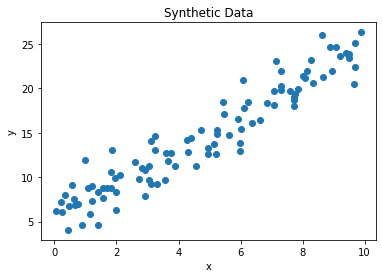

/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_3055/2481218833.py:35: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000, chains=4, random_seed=42)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_1, beta_0]


/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood 

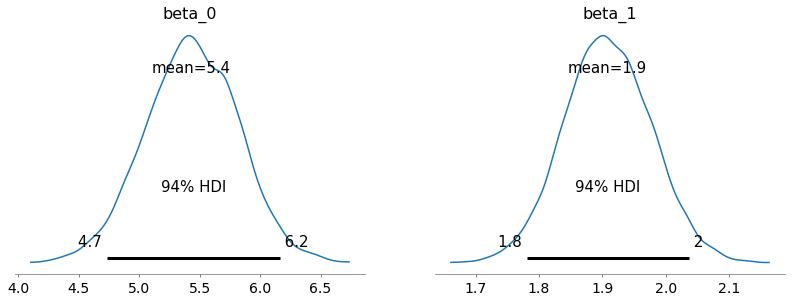

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

# Generate synthetic data from the linear regression model
np.random.seed(42)
true_beta_0 = 5
true_beta_1 = 2
noise_std = 2
n_samples = 100

# Generate independent variable (x) uniformly from 0 to 10
x = np.random.uniform(0, 10, n_samples)

# Generate response variable (y) with noise
y = true_beta_0 + true_beta_1 * x + np.random.normal(0, noise_std, n_samples)

# Plot the synthetic data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

# Create a PyMC3 model
with pm.Model() as model:
    # Priors for the model parameters
    beta_0 = pm.Normal('beta_0', mu=0, sd=10)
    beta_1 = pm.Normal('beta_1', mu=0, sd=10)
    
    # Likelihood for the observed data
    likelihood = pm.Normal('likelihood', mu=beta_0 + beta_1 * x, sd=noise_std, observed=y)
    
    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, chains=4, random_seed=42)

# Plot the posterior distributions of the model parameters
pm.plot_posterior(trace, var_names=['beta_0', 'beta_1'])
plt.show()
